# **Modul 2: Data Analysis**
# Descriptive Statistics

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns


# **No.1**

In [2]:
# Load dataset all_cars.csv yang telah Anda buat.
# Ubah nama kolom 'Unnamed: 0' menjadi 'id' jika ada!
# Jika tidak ada, lakukan reset index. Kemudian kolom paling kiri bernama 'index' ubah menjadi 'id'!

# Load dataset: all_cars.csv
df_car = pd.read_csv('all_cars.csv')
df_car.head()

,Unnamed: 0,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,Audi,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,1,Audi,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,2,Audi,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,3,Audi,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,4,Audi,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [3]:
# rename kolom pertama
df_car.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
df_car.head()

,id,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,Audi,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,1,Audi,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,2,Audi,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,3,Audi,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,4,Audi,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [4]:
df_car['model'].value_counts()[:10]

Yaris     2122
Aygo      1961
A3        1929
Q3        1417
A4        1381
A1        1347
Tucson    1300
I10       1092
A5         882
Q5         877
Name: model, dtype: int64

# **No.2**

In [5]:
# Tampilkan deskripsi statistik dari dataset df_car
df_car.describe(include='all') 

,id,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
count,22266.000000,22266,22266,22266.000000,22266.000000,22266,22266.000000,22266,22266.000000,22266.000000,22266.000000
unique,NaN,3,60,NaN,NaN,4,NaN,4,NaN,NaN,NaN
top,NaN,Audi,Yaris,NaN,NaN,Manual,NaN,Petrol,NaN,NaN,NaN
freq,NaN,10668,2122,NaN,NaN,11806,NaN,12052,NaN,NaN,NaN
mean,11132.500000,NaN,NaN,2016.995509,17542.591575,NaN,23501.863604,NaN,115.473592,55.151181,1.688489
std,6427.784883,NaN,NaN,2.133576,10589.835312,NaN,21111.157417,NaN,68.835239,14.834181,0.566379
min,0.000000,NaN,NaN,1997.000000,850.000000,NaN,1.000000,NaN,0.000000,1.100000,0.000000
25%,5566.250000,NaN,NaN,2016.000000,9999.000000,NaN,7200.000000,NaN,30.000000,44.800000,1.400000
50%,11132.500000,NaN,NaN,2017.000000,14999.000000,NaN,18354.000000,NaN,145.000000,55.400000,1.600000
75%,16698.750000,NaN,NaN,2019.000000,21991.000000,NaN,33100.750000,NaN,145.000000,62.800000,2.000000


# **No.3**

### **Kita mengenal bahwa Variabel dibagi menjadi 2 yaitu variabel Kualitatif dan Kuantitatif**
>### **Var. Kualitatif dibagi menjadi 2, yaitu: Nominal dan Ordinal**
>### **Var. Kualitatif dibagi menjadi 2, yaitu: Continue dan Discrete**
### **Kolom mana saja yang menurut Anda merupakan var. kualitatif? Mana yang Nominal dan Ordinal?**  
>### Kualitatif Nominal: brand, model, transmission, fuel type
>### Kualitatif Ordinal: -
###
### **Kolom mana saja yang menurut Anda merupakan var. kuantitatif? Mana yang Continue dan Discrete?**
>### Kuantitatif Continue: price, mileage, tax, mpg, engineSize, price_spread
>### Kuantitatif Discrete: year

# **No.4**

## **Apa yg dimaksud dengan Measure of Central Tendency?**
### Pengukuran untuk menggambarkan posisi sentral dari distribusi frekuensi untuk sekelompok data.

### Istilah lain --> Estimate of Location: perkiraan di mana kebanyakan data berada 
(Practical Statistic for Data Science - Bruce, 2021 )


In [6]:
# Apa yg dimaksud dengan Measure of Central Tendency?
# pengukuran untuk menggambarkan posisi sentral dari distribusi frekuensi untuk sekelompok data. 

# Tampilkan Measure of Central Tendency dari kolom 'model' dan 'price' 
df_car.describe(include='all').loc[['mean','50%','top']][['model','price']]

# Central Tendency apa yang cocok untuk kolom 'model' dan 'price'?


,model,price
mean,NaN,17542.591575
50%,NaN,14999.000000
top,Yaris,NaN


In [7]:
# Kolom model hanya bisa mengukur modus, karena datanya categorical (kualitatif)
print('Modus kolom model \n', df_car['model'].mode(), '\n')

Modus kolom model 
 0    Yaris
dtype: object 



In [8]:
# Kolom price bisa menggunakan mean atau median, karena datanya numerical (kuantitatif) continuous
print('Modus kolom price \n', df_car['price'].mode(), '\n')
print('Mean kolom price \n', df_car['price'].mean(), '\n')
print('Median kolom price \n', df_car['price'].median(), '\n')
 

Modus kolom price 
 0    9995
dtype: int64 

Mean kolom price 
 17542.591574598042 

Median kolom price 
 14999.0 



In [9]:
# Median lebih robust (tidak sensitif terhadap extreme value) dari pada Mean.

# **No.5**

### **Apa yang dimaksud dengan Measure of Spread?** 
### pengukuran untuk menggambarkan seberapa tersebar data kita. 
### Istilah lain --> Estimates of Variability/Dispersion

### **Standar Deviasi**
### Standar deviasi adalah ukuran variabilitas yang paling sering digunakan. 
### Secara sederhana, standar deviasi adalah rata-rata penyimpangan absolut dari nilai rata-rata. 
### Penyimpangan itu artinya selisih setiap data dengan nilai rata-ratanya.

### **Persentil**
### Persentil adalah nilai yang membagi data yang sudah diurutkan dari yang terkecil ke yang terbesar menjadi 100 bagian yang sama.

### **Interquartile Range (IQR)**
### Interquartile Range atau Rentang inter kuartil adalah jarak antara Q1 dan Q3. Sehingga rumusnya IQR = Q3 - Q1
### IQR dapat digunakan sebagai pengganti standar deviasi saat data tidak terdistribusi normal, karena standar deviasi sangat sensitif terhadap outlier
### Secara umum, standar deviasi sama dengan 1,348 kali dari IQR


In [10]:
# Tampilkan Measure of Spread dari kolom 'price'

# Range
df_car['price'].max() - df_car['price'].min()

144150

In [11]:
# Variance
df_car['price'].var()

112144611.93109098

In [12]:
# Variance
df_car['price_spread'] = (df_car['price'] - df_car['price'].mean())**2
df_car 

df_car['price_spread'].sum()/(len(df_car['price_spread'])-1)

112144611.93109271

In [13]:
# Standard deviation
df_car['price'].std()

10589.835311802115

In [14]:
# Standard deviation
np.sqrt(df_car['price_spread'].sum()/(len(df_car['price_spread'])-1))

10589.835311802195

In [15]:
# IQR
q1 = df_car['price'].quantile(0.25)
q3 = df_car['price'].quantile(0.75)
IQR = q3 - q1
IQR


11992.0

# **No.6**

##  **Outliers/Pencilan**
### Outliers = Extreme Case = Nilai yang sangat jauh dari nilai lainnya pada suatu dataset 
(Bruce, 2021)

In [16]:
# Apakah ada Outlier pada kolom 'price'? Kalau ada, berapa banyak data yang merupakan outliers?
lower = q1 - 1.5*IQR
upper = q3 + 1.5*IQR

# Outlier adalah data yg di luar Batas Atas dan Batas Bawah 
outlier = df_car[(df_car['price']<lower) | (df_car['price']>upper)]
outlier
# df_car[(df_car['price']<lower)]
# df_car[(df_car['price']>upper)]

print('Batas atas  :', upper)
print('Batas bawah :', lower)

print('Jumlah outliers:', len(outlier))

Batas atas  : 39979.0
Batas bawah : -7989.0
Jumlah outliers: 808


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


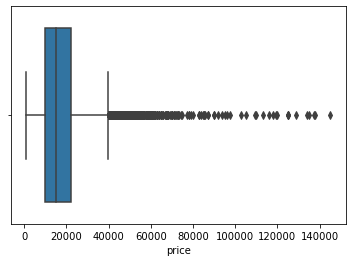

In [17]:
sns.boxplot(df_car['price']);

# **No.7**

In [18]:
# Variabel/kolom apa saja yang memiliki distribusi skewed ke kanan
df_car.describe().loc[['mean','50%']]

# skewed ke kanan (mean > median): 
# price, mileage, engine, engineSize?, price_spread

,id,year,price,mileage,tax,mpg,engineSize,price_spread
mean,11132.5,2016.995509,17542.591575,23501.863604,115.473592,55.151181,1.688489,1.121396e+08
50%,11132.5,2017.000000,14999.000000,18354.000000,145.000000,55.400000,1.600000,4.163357e+07


# **No.8**

In [19]:
# Ho : sample terdistribusi normal
# Ha : sample TIDAK terdistribusi normal

# p-value > 0.05 : accept Ho --> sample terdistribusi normal
# p-value < 0.05 : reject Ho --> sample TIDAK terdistribusi normal (Ha)

In [20]:
# Nilai Mean dan Median dari kolom 'mileage' berbeda jauh. Coba buktikan apakah distribusi kolom tersebut normal atau tidak!
def normal(kolom):
    stat, pvalue = stats.normaltest(kolom)
    print(f'p-value {kolom.name} : {pvalue:.10f}' )
    

    if pvalue < 0.05:
        print(f'Kolom {kolom.name} TIDAK terdistribusi normal')
    else:
        print(f'Kolom {kolom.name} terdistribusi normal')
    
normal(df_car['mileage'])

p-value mileage : 0.0000000000
Kolom mileage TIDAK terdistribusi normal


In [21]:
# perbedaan Mean dan Median dari 'mileage'
df_car.describe().loc[['mean','50%']][['mileage']]

,mileage
mean,23501.863604
50%,18354.000000


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


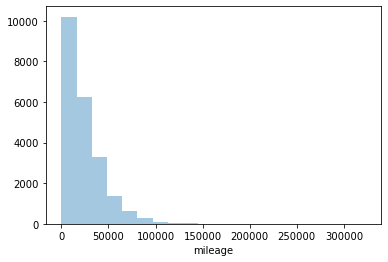

In [22]:
# Histogram
sns.distplot(df_car['mileage'], bins=20, kde=False);

In [23]:
frekuensi = 10000 # (perkiraan) # berapakali mobil dengan mileage antara 1-16150 muncul
jml_mobil = df_car['mileage'].count() # jumlah keseluruhan mobil

prob2 = frekuensi/jml_mobil
prob2



0.4491152429713465

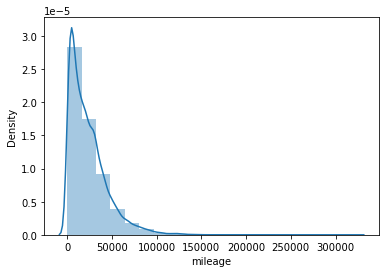

In [24]:
# Density plot
sns.distplot(df_car['mileage'], bins=20, kde=True);

In [25]:
# probability untuk mendapatkan nilai mileage antara 1-16150
alas = df_car['mileage'].max()/20 # rentang nilai mileage antara 1-16150
tinggi = 0.000029 # probability density

prob = alas * tinggi
prob

0.46835

In [26]:
np.linspace(df_car['mileage'].min(), df_car['mileage'].max(), 21)

array([1.0000000e+00, 1.6150950e+04, 3.2300900e+04, 4.8450850e+04,
       6.4600800e+04, 8.0750750e+04, 9.6900700e+04, 1.1305065e+05,
       1.2920060e+05, 1.4535055e+05, 1.6150050e+05, 1.7765045e+05,
       1.9380040e+05, 2.0995035e+05, 2.2610030e+05, 2.4225025e+05,
       2.5840020e+05, 2.7455015e+05, 2.9070010e+05, 3.0685005e+05,
       3.2300000e+05])

# **No.9**

## Grafik apa yang tepat untuk menampilkan visualisasi:

>### **Brand vs Price?** barplot
>### **Price vs Mileage?** scatterplot
>### **Frequency distribution of Mileage?** histogram

<AxesSubplot:xlabel='brand', ylabel='price'>

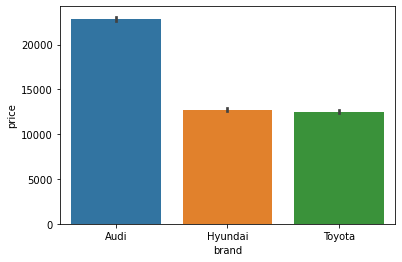

In [29]:
sns.barplot(x='brand', y='price' ,data = df_car)

<AxesSubplot:xlabel='price', ylabel='mileage'>

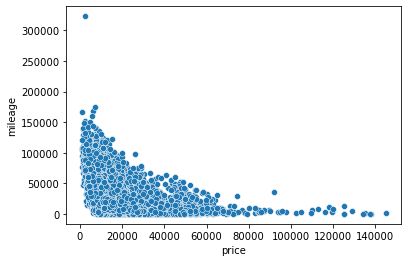

In [31]:
sns.scatterplot(x='price', y='mileage' ,data = df_car)

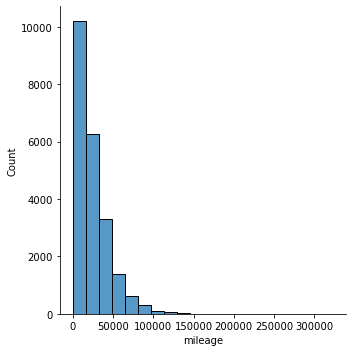

In [32]:
sns.displot(data=df_car, x='mileage', bins=20)